In [1]:
import numpy as np
import tensorflow as tf
import keras
from pydub import AudioSegment
import sys
import io
import os
import glob
import IPython
from td_utils import *
%matplotlib inline

Using TensorFlow backend.
C:\Users\Dev\Miniconda3\envs\tensorflow\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


C:\Users\Dev\Miniconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


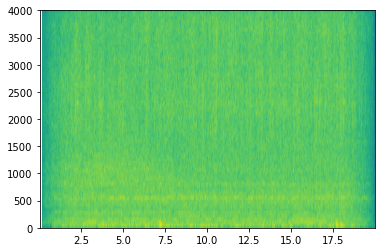

In [2]:
x = graph_spectrogram("./data/_background_noise_/exercise_bike.wav")

In [3]:
_, data = wavfile.read("./data/_background_noise_/exercise_bike.wav")
print("Time steps in audio recording before spectrogram", data.shape)
print("Time steps in input after spectrogram", x.shape)

Time steps in audio recording before spectrogram (160000,)
Time steps in input after spectrogram (101, 5511)


In [4]:
Tx = 5511
n_freq = 101
Ty = 1375

In [5]:
ons,offs,negatives,backgrounds = load_raw_audio() 
print("background len should be 10,000, since it is a 10 sec clip\n" + str(len(backgrounds[0])),"\n")
print("ons[0] len may be around 1000, since an `on` audio clip is usually around 1 second (but varies a lot) \n" + str(len(ons[0])),"\n")
print("ons[1] len: different `activate` clips can have different lengths\n" + str(len(ons[1])),"\n")
print("offs[0]\n" + str(len(offs[0])))

background len should be 10,000, since it is a 10 sec clip
10000 

ons[0] len may be around 1000, since an `on` audio clip is usually around 1 second (but varies a lot) 
743 

ons[1] len: different `activate` clips can have different lengths
975 

offs[0]
1000


In [6]:
def get_random_time_segment(segment_ms):

    
    segment_start = np.random.randint(low=0, high=10000-segment_ms)   # Make sure segment doesn't run past the 10sec background 
    segment_end = segment_start + segment_ms - 1
    
    return (segment_start, segment_end)

In [7]:
def is_overlapping(segment_time,previous_segments):
    segment_start, segment_end = segment_time
    overlap = False
    for previous_start, previous_end in previous_segments:
        if segment_start <= previous_end and segment_end >= previous_start:
            overlap = True     
    
    return overlap

In [8]:
def insert_audio_clip(background, audio_clip, previous_segments):
    segment_ms = len(audio_clip)
    segment_time = get_random_time_segment(segment_ms)
    while is_overlapping(segment_time, previous_segments):
        segment_time = get_random_time_segment(segment_ms)
    previous_segments.append(segment_time)
    new_background = background.overlay(audio_clip, position = segment_time[0])
    
    return new_background, segment_time

In [9]:
def insert_ones(y,segment_end_ms):
    segment_end_y = int(segment_end_ms * Ty / 10000.0)
    for i in range(segment_end_y+1, segment_end_y+51):
        if i < y.shape[1]:
            y[0, i] = 1
    return y

def insert_twos(y,segment_end_ms):
    segment_end_y = int(segment_end_ms*Ty/10000.0)
    for i in range(segment_end_y+1, segment_end_y+51):
        if i < y.shape[1]:
            y[0, i] = 2
    return y

In [10]:
def create_training_example(background, ons,offs, negatives):
    background = background - 20
    y = np.zeros((1,Ty))
    previous_segments = []
    number_of_ons = np.random.randint(1, 3)
    random_indices = np.random.randint(len(ons), size=number_of_ons)
    random_ons = [ons[i] for i in random_indices]
    for random_on in random_ons:
        background, segment_time = insert_audio_clip(background, random_on, previous_segments)
        segment_start, segment_end = segment_time
        y = insert_ones(y, segment_end)
    
    number_of_offs = np.random.randint(1, 3)
    random_indices = np.random.randint(len(offs), size=number_of_offs)
    random_offs = [offs[i] for i in random_indices]
    for random_off in random_offs:
        background, segment_time = insert_audio_clip(background, random_off, previous_segments)
        segment_start, segment_end = segment_time
        y = insert_twos(y, segment_end)
        
        
    number_of_negatives = np.random.randint(0, 2)
    random_indices = np.random.randint(len(negatives), size=number_of_negatives)
    random_negatives = [negatives[i] for i in random_indices]
    for random_negative in random_negatives:
        background, _ = insert_audio_clip(background, random_negative, previous_segments)
    
    background = match_target_amplitude(background, -20.0)
    file_handle = background.export("train" + ".wav", format="wav")
    print("File (train.wav) was saved in your directory.")
    x = graph_spectrogram("train.wav")
    
    return x, y

File (train.wav) was saved in your directory.


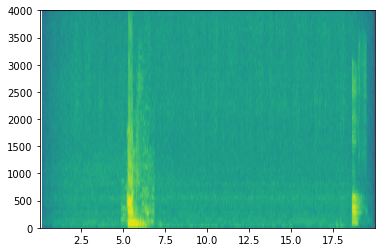

In [11]:
x, y = create_training_example(backgrounds[2], ons,offs, negatives)

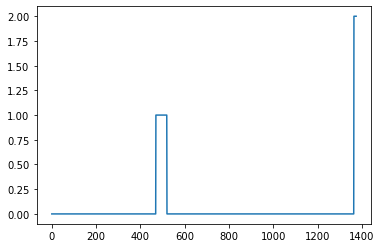

In [12]:
plt.plot(y[0])

In [13]:
print(x.shape)

(101, 5511)


File (train.wav) was saved in your directory.
0
File (train.wav) was saved in your directory.


C:\Users\Dev\Miniconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


1
File (train.wav) was saved in your directory.
2
File (train.wav) was saved in your directory.
3
File (train.wav) was saved in your directory.
4
File (train.wav) was saved in your directory.
5
File (train.wav) was saved in your directory.
6
File (train.wav) was saved in your directory.
7
File (train.wav) was saved in your directory.
8
File (train.wav) was saved in your directory.
9
File (train.wav) was saved in your directory.
10
File (train.wav) was saved in your directory.
11
File (train.wav) was saved in your directory.
12
File (train.wav) was saved in your directory.
13
File (train.wav) was saved in your directory.
14
File (train.wav) was saved in your directory.
15
File (train.wav) was saved in your directory.
16
File (train.wav) was saved in your directory.
17
File (train.wav) was saved in your directory.
18
File (train.wav) was saved in your directory.
19
File (train.wav) was saved in your directory.
20
File (train.wav) was saved in your directory.
21
File (train.wav) was saved

168
File (train.wav) was saved in your directory.
169
File (train.wav) was saved in your directory.
170
File (train.wav) was saved in your directory.
171
File (train.wav) was saved in your directory.
172
File (train.wav) was saved in your directory.
173
File (train.wav) was saved in your directory.
174
File (train.wav) was saved in your directory.
175
File (train.wav) was saved in your directory.
176
File (train.wav) was saved in your directory.
177
File (train.wav) was saved in your directory.
178
File (train.wav) was saved in your directory.
179
File (train.wav) was saved in your directory.
180
File (train.wav) was saved in your directory.
181
File (train.wav) was saved in your directory.
182
File (train.wav) was saved in your directory.
183
File (train.wav) was saved in your directory.
184
File (train.wav) was saved in your directory.
185
File (train.wav) was saved in your directory.
186
File (train.wav) was saved in your directory.
187
File (train.wav) was saved in your directory.


333
File (train.wav) was saved in your directory.
334
File (train.wav) was saved in your directory.
335
File (train.wav) was saved in your directory.
336
File (train.wav) was saved in your directory.
337
File (train.wav) was saved in your directory.
338
File (train.wav) was saved in your directory.
339
File (train.wav) was saved in your directory.
340
File (train.wav) was saved in your directory.
341
File (train.wav) was saved in your directory.
342
File (train.wav) was saved in your directory.
343
File (train.wav) was saved in your directory.
344
File (train.wav) was saved in your directory.
345
File (train.wav) was saved in your directory.
346
File (train.wav) was saved in your directory.
347
File (train.wav) was saved in your directory.
348
File (train.wav) was saved in your directory.
349
File (train.wav) was saved in your directory.
350
File (train.wav) was saved in your directory.
351
File (train.wav) was saved in your directory.
352
File (train.wav) was saved in your directory.


498
File (train.wav) was saved in your directory.
499
(500, 5511, 101)
(500, 1375, 1)


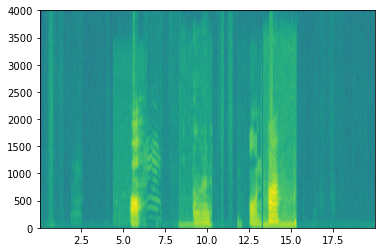

In [14]:
X = []
Y = []
for i in range(500):
    x, y = create_training_example(backgrounds[i%3], ons,offs, negatives)
    print(i)
    x = np.array(x).T
    y = np.array(y).T
    X.append(x)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

In [15]:
import time
root_logdir = os.path.join(os.curdir,'my_logs')
def get_run_logdir():
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir,run_id)

run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

# %load_ext tensorboard
# %tensorboard --logdir=./my_logs --port=6006

In [16]:
import keras 
import tensorflow as tf
from keras import models
from keras.models import Model
pre_trained = keras.models.load_model('tr_model.h5')

C:\Users\Dev\Miniconda3\envs\tensorflow\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [17]:
model = keras.models.clone_model(pre_trained)

In [18]:
model.set_weights(pre_trained.get_weights())

In [19]:
for layer in model.layers[:-1]:
    layer.trainable =  False
    
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 5511, 101)         0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1375, 256)         388096    
_________________________________________________________________
batch_normalization_7 (Batch (None, 1375, 256)         1024      
_________________________________________________________________
activation_3 (Activation)    (None, 1375, 256)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 1375, 256)         0         
_________________________________________________________________
gru_5 (GRU)                  (None, 1375, 128)         147840    
_________________________________________________________________
dropout_8 (Dropout)          (None, 1375, 128)         0   

In [20]:
last_layer = model.get_layer('dropout_10')
last_output = last_layer.output

In [21]:
from keras.callbacks import ModelCheckpoint
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D
from keras.layers import GRU, Bidirectional, BatchNormalization, Reshape
from keras.optimizers import Adam

y = TimeDistributed(Dense(3, activation = "softmax"))(last_output)
model = Model(model.input, y)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 5511, 101)         0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1375, 256)         388096    
_________________________________________________________________
batch_normalization_7 (Batch (None, 1375, 256)         1024      
_________________________________________________________________
activation_3 (Activation)    (None, 1375, 256)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 1375, 256)         0         
_________________________________________________________________
gru_5 (GRU)                  (None, 1375, 128)         147840    
_________________________________________________________________
dropout_8 (Dropout)          (None, 1375, 128)         0   

In [22]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("model.h5",save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 20,restore_best_weights= True)

In [23]:
adam = keras.optimizers.Adam(learning_rate=0.00005)
rms = keras.optimizers.RMSprop(learning_rate = 0.00005)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = rms, metrics=['accuracy'])
history = model.fit(X,Y,epochs = 500,validation_split = 0.1,batch_size = 5,callbacks = [checkpoint_cb,early_stopping_cb])

Train on 450 samples, validate on 50 samples
Epoch 1/500
450/450 [==============================] - 63s 140ms/step - loss: 1.8762 - accuracy: 0.3669 - val_loss: 0.8471 - val_accuracy: 0.8674
Epoch 2/500
450/450 [==============================] - 64s 143ms/step - loss: 1.6759 - accuracy: 0.4175 - val_loss: 0.6948 - val_accuracy: 0.8844
Epoch 3/500
450/450 [==============================] - 63s 140ms/step - loss: 1.5032 - accuracy: 0.4663 - val_loss: 0.5771 - val_accuracy: 0.8873
Epoch 4/500
450/450 [==============================] - 58s 130ms/step - loss: 1.3535 - accuracy: 0.5148 - val_loss: 0.4909 - val_accuracy: 0.8875
Epoch 5/500
450/450 [==============================] - 62s 138ms/step - loss: 1.2146 - accuracy: 0.5617 - val_loss: 0.4309 - val_accuracy: 0.8878
Epoch 6/500
450/450 [==============================] - 68s 152ms/step - loss: 1.0966 - accuracy: 0.6065 - val_loss: 0.3912 - val_accuracy: 0.8879
Epoch 7/500
450/450 [==============================] - 65s 145ms/step - loss: 0

In [24]:
import pandas as pd
def plot_training_accuracy(history):

    pd.DataFrame(history.history).plot()
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

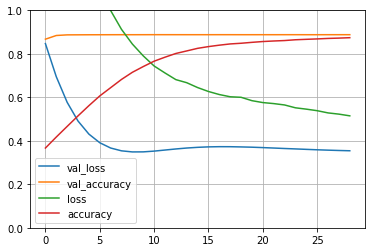

In [25]:
plot_training_accuracy(history)

In [26]:
def detect_triggerword(filename):
    plt.subplot(2, 1, 1)

    x = graph_spectrogram(filename)
    # the spectrogram outputs (freqs, Tx) and we want (Tx, freqs) to input into the model
    x  = x.swapaxes(0,1)
    x = np.expand_dims(x, axis=0)
    predictions = model.predict(x)
    
    print(predictions.shape)
    plt.subplot(2, 1, 2)
    plt.plot(predictions[0,:,1])
    plt.plot(predictions[0,:,2])
    plt.ylabel('probability')
    plt.show()
    return predictions

In [27]:
chime_file = "chime.wav"
beep_file = 'beep.wav'
def chime_on_activate(filename, predictions, threshold_on, threshold_off):
    audio_clip = AudioSegment.from_wav(filename)
    chime = AudioSegment.from_wav(chime_file)
    beep = AudioSegment.from_wav(beep_file)
    Ty = predictions.shape[1]
    # Step 1: Initialize the number of consecutive output steps to 0
    consecutive_timesteps = 0
    # Step 2: Loop over the output steps in the y
    for i in range(Ty):
        # Step 3: Increment consecutive output steps
        consecutive_timesteps += 1
        # Step 4: If prediction is higher than the threshold and more than 75 consecutive output steps have passed
        if predictions[0,i,1]>threshold_on and predictions[0,i,1]>predictions [0,i,2] and consecutive_timesteps>75 :
            audio_clip = audio_clip.overlay(beep, position = ((i / Ty) * audio_clip.duration_seconds)*1000)
            consecutive_timesteps = 0
            
            
        if predictions[0,i,2] > threshold_off and predictions[0,i,2]>= predictions[0,i,1] and consecutive_timesteps > 75 and not flag:
            audio_clip = audio_clip.overlay(chime, position = ((i / Ty) * audio_clip.duration_seconds)*1000)
            consecutive_timesteps = 0
            
            
        flag = False    
    audio_clip.export("chime_output.wav", format='wav')

File (train.wav) was saved in your directory.


C:\Users\Dev\Miniconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


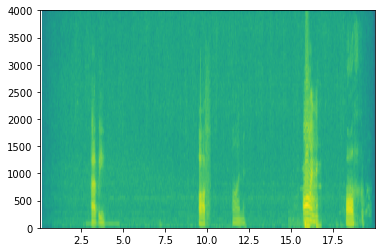

In [28]:
_,_ = create_training_example(backgrounds[2], ons,offs, negatives)
IPython.display.Audio("./train.wav")

(1, 1375, 3)


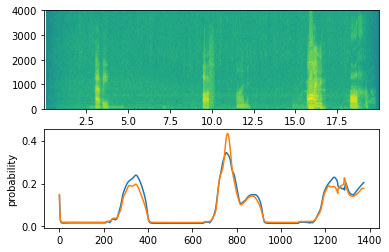

In [29]:
filename = "./train.wav"
prediction = detect_triggerword(filename)
chime_on_activate(filename, prediction, 0.3,0.2)
IPython.display.Audio("./chime_output.wav")